# K Means

First Data processing

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('HTRU_2.csv')
import time

def min_max_scale(x,min_x, max_x):
    z = (x-min_x)/(max_x-min_x)
    return z

for xn in df.columns:
    min_val, max_val = df[xn].min(), df[xn].max()
    df[xn] = min_max_scale(df[xn], min_val, max_val)
df=df.to_numpy()



In [95]:
print(np.shape(df))
print((np.shape(df)[0]))

(17898, 8)
17898


## 4 main steps to follow:
1. find initial centroids
2. assign a cluster to each point
3. recalculate centroids
4. assign a cluster to each point

In [96]:
def find_initial_centroid_v3(dataset,k):
    s_id = np.random.randint(0,np.shape(dataset)[0])
    #print("starting centroid index",s_id)
    sample=dataset[s_id, :]
    #print(sample)
    distances=[]
    for j in range(len(dataset)):
        dist = ((np.sum((sample-dataset[j])**2))**0.5)  #compare row j with our sample
        distances.append(dist)  #join distances
    starting_centroid=np.argsort(distances)[-(1):]  #new centroid is the max distances
    return(starting_centroid)

k=4
centroid= find_initial_centroid_v3(df, k)

def initiate_clusters(dataset, k):
    clusters={}
    used_centroids=[]
    for i in range(k):
        clusters[i] = []
        while True:
            potential_centroid = find_initial_centroid_v3(dataset, k).item()
            if potential_centroid not in used_centroids:
                clusters[i].append(potential_centroid)
                used_centroids.append(potential_centroid)
                break
    cluster_centroid_list = []
    for p in clusters:
        cluster_centroid_list.extend(clusters[p])                
    return clusters, cluster_centroid_list #return it as dict and as a list, this is because this is a fix to a previous issue, and next funct expects a lsit

initiate_clusters(df, k)

({0: [9524], 1: [4561], 2: [9254], 3: [12081]}, [9524, 4561, 9254, 12081])

In [ ]:
def assign_cluster(dataset, centroid_indexes):
    #### first i initialize my clusters, i will give them an index and to this index add the rows 
    clusters = {}
    centroid_list = dataset[centroid_indexes]
    for i in range(len(centroid_list)):
        clusters[i] = []
    i=0
    for row in dataset:
        i=i+1
        delta_row_centroid=[]
        for centroid in centroid_list:   #mirror AA
            dist = ((np.sum((row-centroid)**2))**0.5)
            delta_row_centroid.append(dist)
        closest_centroid = np.argmin(delta_row_centroid)     #mirror BB
        clusters[closest_centroid].append(row)  #mirror CC
    #### the following loop is just for visualization purposes
    ll=0
    for cluster in clusters:
        ll=ll+1
    old_mean=0 ################old mean
    truth_count=0
    while True:
        truth_count=truth_count+1
        new_clusters={}
        for m in range(len(centroid_list)):
            new_clusters[m] = []
        new_centroids_values=[] #values not indexes
        #### now i have new_clusters, which should be the same as clusters before i filled it in
        #### the following loop calculates the means, assign them as new_centroid_values, analog to centroid_list
        #### and also evaluates the stopping criterion
        new_mean=0
        for ii in range(len(centroid_list)):
            new_centroid=np.mean(clusters[ii], axis=0)
            new_centroids_values.append(new_centroid)
            new_mean=np.sum(np.abs(new_centroid))+new_mean
        mean_diff_criterion=(new_mean-old_mean)/len(centroid_list)
        if mean_diff_criterion<0.01:  #applying stopping criterion
            print("broken at",truth_count)
            break
        #### now i have my centroids, and just as i previously did, compare each row against each centroid
        iii=0
        for row in dataset:
            iii=iii+1
            delta_row_centroid_new=[]
            for centroid in new_centroids_values:  #mirror AA
                dist_new = ((np.sum((row-centroid)**2))**0.5)
                delta_row_centroid_new.append(dist_new)
            closest_centroid_new = np.argmin(delta_row_centroid_new)    #mirror BB
            new_clusters[closest_centroid_new].append(row)  #mirror CC
        ll=0
        for n_cluster in new_clusters:
            ll=ll+1
        old_mean=new_mean
        return new_clusters, new_centroids_values
start = time.time()
centroids_dict, centroids_list= initiate_clusters(df, k)
assigned, centroids=assign_cluster(df, centroids_list)
end = time.time()

print("Running time",(end-start) * 10**3, "ms")
print("Clusters", "\n", assigned)


Running time 4855.644941329956 ms
Clusters 
 {0: [array([0.72134164, 0.41768745, 0.16504291, 0.01562717, 0.01338219,
       0.11368057, 0.29498574, 0.06388987]), array([0.51762787, 0.46090841, 0.23541516, 0.01826776, 0.00655997,
       0.0725243 , 0.36401483, 0.10844339]), array([0.70093263, 0.43788377, 0.18174959, 0.01653441, 0.01536779,
       0.13158337, 0.26634832, 0.04658145]), array([0.6974196 , 0.36373601, 0.18401248, 0.02174837, 0.04090708,
       0.29752531, 0.19864341, 0.01731015]), array([0.59717285, 0.39370091, 0.21456513, 0.01984214, 0.02601134,
       0.16844574, 0.21091401, 0.02305122]), array([0.5397934 , 0.42692173, 0.22667123, 0.02182627, 0.00996171,
       0.10685338, 0.33222462, 0.08284915]), array([0.5722889 , 0.34495755, 0.21672062, 0.02379156, 0.03615288,
       0.29475216, 0.20783654, 0.01949172]), array([0.7293296 , 0.39322185, 0.14129343, 0.0238354 , 0.01886319,
       0.19088546, 0.26064647, 0.04016923]), array([0.64196395, 0.37679854, 0.19129471, 0.01949041,

In [98]:
print(centroids_list)

[12081, 4561, 9254, 9524]


In [99]:
def dist_finder(clusters, centroids):
    distorsions = 0
    for cluster in clusters:
        centroid = centroids[cluster]
        cluster_features_array = np.array(clusters[cluster])
        if cluster_features_array.shape[0] > 0:
            euc = np.linalg.norm(cluster_features_array - centroid, axis=1) #im using intra array distances but slides say loglikelihood, need to fix
            distorsions = np.sum(euc)+distorsions

    return distorsions

dist_finder(assigned, centroids_list)




488067373.34794426

In [ ]:
ks = range(1, 11)
distorsions = []
for k in ks:
    centroids_dict, centroids_list = initiate_clusters(df, k)
    assigned, centroids = assign_cluster(df, centroids_list)
    distorsion = dist_finder(assigned, centroids)
    print("inertia tracker", distorsion)
    distorsions.append(distorsion)

    


inertia tracker 4877.985993532744
inertia tracker 4446.374858651132
inertia tracker 3674.623604982929
inertia tracker 3610.4006930101955
inertia tracker 3461.1446282654706
inertia tracker 3185.45071558129
inertia tracker 3145.1120994581133
inertia tracker 3125.364041660756
inertia tracker 2851.612093921661
inertia tracker 2829.1683264627686


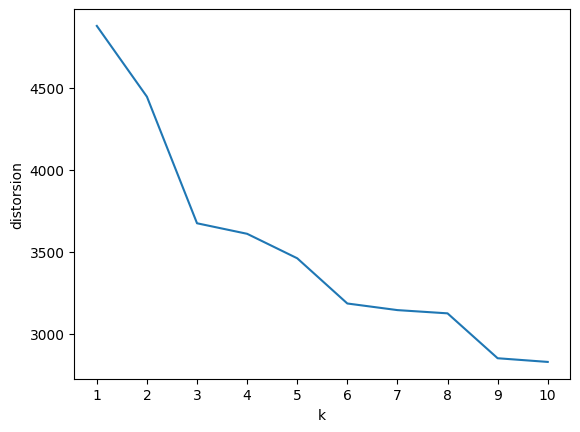

In [101]:
import matplotlib.pyplot as plt
plt.plot(ks, distorsions)
plt.ylabel("distorsion")
plt.xlabel("k")
plt.xticks(ks)
plt.show()

# PCA
Use PCA to reduce the number of dimensions to a low dimensional representation of the data. 
We use PCA to reduce the dimensionality of the data and represent the clusters (from the K-Means) in a 3D graph

In [ ]:
#guidance from the following page: https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
#key insights:
#If X=USV⊤ then the columns of V are principal directions/axes (eigenvectors).
#The above is correct only if X is centered.

#So i need to center and take V
df2=df.copy()
def centering(x, mean):
    movement=x-mean
    return movement
for i in range(df2.shape[1]):
    mean_aux=np.mean(df2[:, i])
    df2[:, i]=centering(df2[:, i], mean_aux) 

U, S, VH= np.linalg.svd(df2, full_matrices=False) #dont know what they mean, those are the names in documentation
print("df2",np.shape(df))
print("U",np.shape(U))
print("S",np.shape(S))
print("VH",np.shape(VH))


#df2=df2@VH
#df2=np.dot(df2,VH)


#Explanation of concept from https://wayama.io/en/rec/linalg/03/
#i get: "Using the column vectors or row vectors of U, Σ, and VT corresponding to the top k singular values
#Ak=U[:,:k]Σ[:k,:k]VT[:k,:]...This enables more efficient data representation for purposes such as 
#dimensionality reduction or noise reduction"

VHT=VH.T[:, :3]
df2=df2@VHT
#df2=np.dot(df2,VHT)

print("df2",np.shape(df2))
print(df2)


df2 (17898, 8)
U (17898, 8)
S (8,)
VH (8, 8)
df2 (17898, 3)
[[-0.13835756 -0.16093835  0.02666218]
 [-0.12722349  0.01652815 -0.02852674]
 [-0.01943976  0.06351838  0.08087874]
 ...
 [ 0.2547475  -0.27378958  0.02079089]
 [-0.1508868  -0.00565627 -0.01102297]
 [ 0.74500775 -0.30435233 -0.41593435]]


In [175]:
centroids_dict_pca, centroids_list_pca = initiate_clusters(df2, 7)
assigned_pca, centroids_pca = assign_cluster(df2, centroids_list_pca)





In [ ]:
df4 = pd.concat([pd.Series(v, name=k) for k, v in assigned_pca.items()], axis=1)
#guidance for converting dict to df from https://stackoverflow.com/questions/19736080/creating-dataframe-from-a-dictionary-where-entries-have-different-lengths
df4=pd.melt(df4, value_vars=df4.columns, var_name='Cluster', value_name='entry')
df4 = df4.dropna()
df4_aux = df4["entry"].apply(pd.Series)
df4 = (df4.drop(columns=["entry"])).join(df4_aux)

display(df4)

,Cluster,0,1,2
0,0,0.448026,-0.366645,-0.042724
1,0,0.509424,-0.429390,-0.108456
2,0,0.823885,0.059620,-0.269806
3,0,0.359504,-0.283532,0.025801
4,0,0.792747,-0.053827,-0.138232
...,...,...,...,...
61972,6,0.234006,-0.198276,0.058923
61973,6,0.214207,-0.242487,0.035271
61974,6,0.165291,-0.175157,0.062451
61975,6,0.158515,-0.179011,0.074508


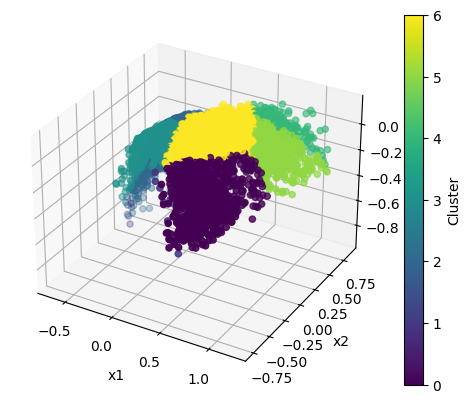

In [192]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = df4.iloc[:, -3]
x2 = df4.iloc[:, -2]
x3 = df4.iloc[:, -1] #last column 

scatter_plot=ax.scatter(x1, x2, x3, c=df4['Cluster'])

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.colorbar(scatter_plot, label='Cluster')
plt.show()